# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


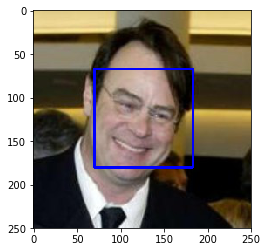

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

facecount = 0
with tqdm(total=len(human_files_short)) as pbar:
    for human in human_files_short:
        if face_detector(human):
            facecount+=1
        pbar.update(1)
        
print('Total percentage of human faces detected in human_files folder is', (facecount/100)*100 )
facecount2 = 0
with tqdm(total=len(dog_files_short)) as pbar2:
    for dog in dog_files_short:
        if face_detector(dog):
            facecount2+=1
        pbar2.update(1)
            
print('Total percentage of human faces detected in dog_files folder is', (facecount2/100)*100)

  0%|          | 0/100 [00:00<?, ?it/s]

Total percentage of human faces detected in human_files folder is 98.0


100%|██████████| 100/100 [00:30<00:00,  3.28it/s]

Total percentage of human faces detected in dog_files folder is 17.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:07<00:00, 77721051.87it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    transform =transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.ToTensor(),
            normalize,
        ])
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image = Image.open(img_path)
    image_1 = transform(image).unsqueeze(0)
    if use_cuda:
        image_1 = image_1.cuda()
    output = VGG16(image_1)
    _, pred = torch.max(output, 1)  
    return pred.item() # predicted class index

In [8]:
VGG16_predict(dog_files_short[0])

243

In [9]:
VGG16_predict(human_files_short[0])

906

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    i = VGG16_predict(img_path)
    if 150 < i < 269:
        return True
    else:
        return False # true/false

In [11]:
dog_detector(dog_files_short[0])

True

In [12]:
dog_detector(human_files_short[0])

False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ Please see output for the code cell below, I have printed out the answer in code result, thanks.


In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dogcount = 0
with tqdm(total=len(human_files_short)) as pbar:
    for human in human_files_short:
        if dog_detector(human):
            dogcount+=1
        pbar.update(1)
        
print('Total percentage of dogs detected in human_files folder is', dogcount,'/',len(human_files_short))
dogcount2 = 0
with tqdm(total=len(dog_files_short)) as pbar2:
    for dog in dog_files_short:
        if dog_detector(dog):
            dogcount2+=1
        pbar2.update(1)
            
print('Total percentage of dogs detected in dog_files folder is',dogcount2,'/' ,len(dog_files_short))

  3%|▎         | 3/100 [00:00<00:03, 26.68it/s]

Total percentage of dogs detected in human_files folder is 1 / 100


100%|██████████| 100/100 [00:04<00:00, 25.98it/s]

Total percentage of dogs detected in dog_files folder is 94 / 100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [14]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
import os
from torchvision import datasets
import torchvision.transforms as transforms

batch_size= 20
num_workers= 0

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
train_transform =transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ToTensor(),
            normalize
        ])
test_transform =transforms.Compose([
            transforms.Resize(size=(224, 224)),
            transforms.ToTensor(),
            normalize           
        ])
train_data = datasets.ImageFolder('/data/dog_images/train/', transform=train_transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid/', transform=test_transform)
test_data = datasets.ImageFolder('/data/dog_images/test/', transform=test_transform)


train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,  num_workers=num_workers, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=False)

loaders_scratch = {'train': train_loader,
          'valid': valid_loader,
          'test':test_loader }

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 1) I used RandomResizedCrop for resizing the images by cropping (this will also help in scale invariance). I used 224x 224 as size for input tensor, it is good practice to research about already implemented solutions  so I researched what input tensor size torchvision models use, which is 224 by 224 so I concluded this is a good start.
2) Yes, I used data augmentation for increasing the number of training images so that the model trains better and I used RandomHorizontalFlip for translation invariance and RandomRotation for rotation invariance for this.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3,stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3,padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3,stride=2, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3,padding=1)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 =nn.Linear(128*7*7, 500)
        self.fc2 =nn.Linear(500,133)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.conv1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.conv3(x)
        x = self.pool(F.relu(self.conv4(x)))
        x = self.conv5(x)
        x = self.pool(F.relu(self.conv6(x)))
        x = x.view(-1, 128*7*7)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  I am stacking 2 conv layers at each step of feature extractor so that it can extract as many features as possible to predict dog breeds correctly.
1. First I stacked 2 convolution layers of depth 32, first conv layer is with stride 2 so as to reduce the spatial size of conv layer 1, then a relu and pooling layer. 
2. Then I used another stack of 2 convolution layers of depth of 64( here also first conv layer is with stride 2) then a relu and pooling layer.
2. Now again I stacked 2 convolution layers of depth 128 . Then I applied densely connected network with 2 linear layers and the output with 133 classes (same as the number of folders in dog_images/train folder)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters() ,lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        #valid_loss = valid_loss/len(loaders['valid'].dataset)
        
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
            print('Saving model...')
            
        
    # return trained model
    return model


# train the model
model_scratch = train(40, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.884692 	Validation Loss: 4.871420
Saving model...
Epoch: 2 	Training Loss: 4.848922 	Validation Loss: 4.791334
Saving model...
Epoch: 3 	Training Loss: 4.789988 	Validation Loss: 4.726182
Saving model...
Epoch: 4 	Training Loss: 4.702081 	Validation Loss: 4.585570
Saving model...
Epoch: 5 	Training Loss: 4.624103 	Validation Loss: 4.571803
Saving model...
Epoch: 6 	Training Loss: 4.627072 	Validation Loss: 4.474686
Saving model...
Epoch: 7 	Training Loss: 4.536726 	Validation Loss: 4.552500
Epoch: 8 	Training Loss: 4.496075 	Validation Loss: 4.333938
Saving model...
Epoch: 9 	Training Loss: 4.436318 	Validation Loss: 4.328011
Saving model...
Epoch: 10 	Training Loss: 4.399234 	Validation Loss: 4.243357
Saving model...
Epoch: 11 	Training Loss: 4.357963 	Validation Loss: 4.268838
Epoch: 12 	Training Loss: 4.318106 	Validation Loss: 4.142785
Saving model...
Epoch: 13 	Training Loss: 4.284247 	Validation Loss: 4.109300
Saving model...
Epoch: 14 	Training Loss: 4

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.429101


Test Accuracy: 19% (160/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
## TODO: Specify data loaders
import os
from torchvision import datasets
import torchvision.transforms as transforms

batch_size= 20
num_workers= 0

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transform =transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.RandomResizedCrop(224),
            transforms.ToTensor()
            ])
test_transform =transforms.Compose([
            transforms.Resize(size=(224,224)),
            transforms.ToTensor(),
            
        ])
train_data = datasets.ImageFolder('/data/dog_images/train/', transform=train_transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid/', transform=test_transform)
test_data = datasets.ImageFolder('/data/dog_images/test/', transform=test_transform)


train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,  num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

loaders_transfer = {'train': train_loader,
          'valid': valid_loader,
          'test':test_loader }


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [24]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg19(pretrained=True)
for param in model_transfer.features.parameters():
    param.requires_grad = False
for param in model_transfer.classifier.parameters():
    param.requires_grad = True
num_classes = 133
model_transfer.classifier[6] = nn.Sequential(nn.Linear(4096,1000), nn.ReLU(True),nn.Dropout(0.5),nn.Linear(1000,num_classes))

if use_cuda:
    model_transfer = model_transfer.cuda()
    

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I have chosen VGG19 because this model is used for Large-Scale Image Recognition as per torchvision docs, it has pretty low top-1 and top-5 error as well. Since we have a small dataset with some similar classes (that is common with VGG model output categories from 'Chihuahua' to 'Mexican hairless') we are simply adding another linear layer at the end of VGG19 network, the feature extractor has all the information we need so that remains as it is. Also we are not retraining convolution layers to avoid overfitting as well.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [25]:
criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters() ,lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [26]:
# train the model
model_transfer = train(40, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 5.026637 	Validation Loss: 4.769300
Saving model...
Epoch: 2 	Training Loss: 4.795467 	Validation Loss: 4.377851
Saving model...
Epoch: 3 	Training Loss: 4.498984 	Validation Loss: 3.785153
Saving model...
Epoch: 4 	Training Loss: 4.077267 	Validation Loss: 3.320180
Saving model...
Epoch: 5 	Training Loss: 3.679211 	Validation Loss: 3.070768
Saving model...
Epoch: 6 	Training Loss: 3.352570 	Validation Loss: 3.013109
Saving model...
Epoch: 7 	Training Loss: 3.112868 	Validation Loss: 2.906816
Saving model...
Epoch: 8 	Training Loss: 2.884118 	Validation Loss: 2.988377
Epoch: 9 	Training Loss: 2.665877 	Validation Loss: 3.111266
Epoch: 10 	Training Loss: 2.493180 	Validation Loss: 2.815526
Saving model...
Epoch: 11 	Training Loss: 2.317990 	Validation Loss: 3.185088
Epoch: 12 	Training Loss: 2.210066 	Validation Loss: 2.752295
Saving model...
Epoch: 13 	Training Loss: 2.089081 	Validation Loss: 2.629788
Saving model...
Epoch: 14 	Training Loss: 1.979701 	Validat

In [27]:
# I believe if I keep on training for 10 more epochs (50 total epochs), the loss can go more low, so I am doing that here:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 1.821789 	Validation Loss: 1.710749
Saving model...
Epoch: 2 	Training Loss: 1.834680 	Validation Loss: 1.987774
Epoch: 3 	Training Loss: 1.808722 	Validation Loss: 1.608440
Saving model...
Epoch: 4 	Training Loss: 1.816352 	Validation Loss: 1.535633
Saving model...
Epoch: 5 	Training Loss: 1.762120 	Validation Loss: 1.447009
Saving model...
Epoch: 6 	Training Loss: 1.780368 	Validation Loss: 1.503797
Epoch: 7 	Training Loss: 1.776088 	Validation Loss: 1.333953
Saving model...
Epoch: 8 	Training Loss: 1.692348 	Validation Loss: 1.326183
Saving model...
Epoch: 9 	Training Loss: 1.734334 	Validation Loss: 1.360895
Epoch: 10 	Training Loss: 1.726293 	Validation Loss: 1.382155


In [ ]:
# the test accuracy was less than 60 percent so I am training for 10 more epochs
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 1.756782 	Validation Loss: 1.356628
Saving model...
Epoch: 2 	Training Loss: 1.717813 	Validation Loss: 1.274604
Saving model...
Epoch: 3 	Training Loss: 1.696642 	Validation Loss: 1.295244
Epoch: 4 	Training Loss: 1.737366 	Validation Loss: 1.234735
Saving model...
Epoch: 5 	Training Loss: 1.656523 	Validation Loss: 1.251547
Epoch: 6 	Training Loss: 1.702738 	Validation Loss: 1.234352
Saving model...
Epoch: 7 	Training Loss: 1.652317 	Validation Loss: 1.241435


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [30]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.308952


Test Accuracy: 62% (521/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [31]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    transform =transforms.Compose([
             transforms.Resize(size=(224,224)),
             transforms.ToTensor()])
    image = Image.open(img_path)
    image_1 = transform(image).unsqueeze(0)
    if use_cuda:
        image_1 = image_1.cuda()
    output = model_transfer(image_1)
    _, pred = torch.max(output, 1)
    breed = class_names[pred.item()]
    return breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [32]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()
#     image_1 = transform(image).unsqueeze(0)
#     if use_cuda:
#         image_1 = image_1.cuda()
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        dog_breed =predict_breed_transfer(img_path)
        print("Hello dog! You are a", dog_breed, 'my favorite breed!! :D ')
        
    elif face_detector(img_path):
        dog_breed =predict_breed_transfer(img_path)
        print("Hello Human! You resemble alot like my favorite:", dog_breed)
    else: 
        print("Waoh!!! Your are not a dog nor a human, Who are you :O ")
           

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
1. First, I will try to improve face_detecton function, you can see that it is detecting human faces in dog images as well, so I will probably try to look for more accurate model for human face detection or may be use transfer learrning for human face detection as well.
2. Secondly, I will improve the dog_breed_classsifier by using more training images and augmenting data more.Also I am thinking taking the highest 2 class probablities and printing name of those 2 categories like so "Hello Dog! you are either a Curly-Coated Retriever or a  American Water Spaniel....."
3. Third point of improvement can be better hyperparameter values that can help in acheiving more accuracy fast for all models.


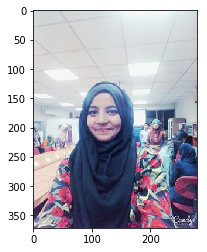

Hello Human! You resemble alot like my favorite: Japanese chin


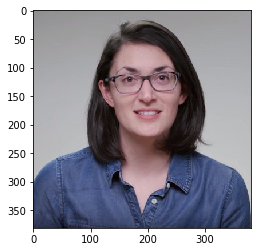

Hello Human! You resemble alot like my favorite: Lowchen


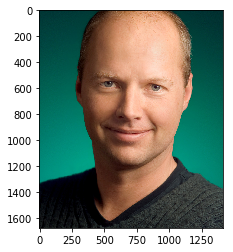

Hello Human! You resemble alot like my favorite: Pharaoh hound


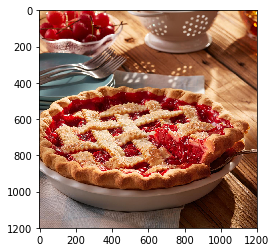

Waoh!!! Your are not a dog nor a human, Who are you :O 


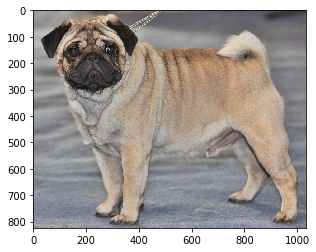

Hello dog! You are a French bulldog my favorite breed!! :D 


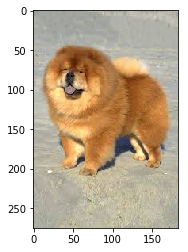

Hello dog! You are a Pomeranian my favorite breed!! :D 


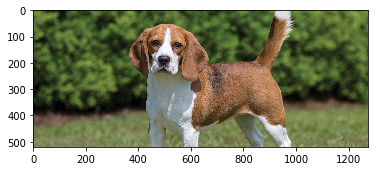

Hello dog! You are a American foxhound my favorite breed!! :D 


In [36]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
my_human_files = ['images/Sidrah.jpg',
                  'images/CezzanneCamacho.jpg', 
                  'images/SebastianThrun.jpg',
                 'images/CherryPie.jpg']
my_dog_files = ['images/Pug.jpg',
                  'images/ChowChow.jpg', 
                  'images/Beagle.jpg' ]

## suggested code, below
for file in np.hstack((my_human_files[:4], my_dog_files[:3])):
    run_app(file)